# SVR vs. KRR: Sine Data Set
Import libraries and generate data set.

In [1]:
import numpy as np
from sklearn.svm import SVR
from sklearn.kernel_ridge import KernelRidge
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

# Generate the Sine Data Set
np.random.seed(0)
x = np.linspace(0,24,200).reshape(-1,1)
y = np.sin(x) + 0.5*np.random.rand(x.size,1)

### We can investigate different scenarios of the train/test split of the 200 samples:

Option 1: First 100 as training, next 100 as testing

In [2]:
# X_train, X_test, y_train, y_test = x[:100], x[100:], y[:100], y[100:]

Option 2: Random 100 as training, random 100 as testing

In [3]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=0)

Option 3: First 50 and last 50 as training, middle 100 as testing

In [4]:
# X_train, X_test, y_train, y_test = np.concatenate([x[:50], x[150:]]),x[50:150],\
#                                    np.concatenate([y[:50], y[150:]]),y[50:150]

Pick one option above, then proceed to visualize the data.

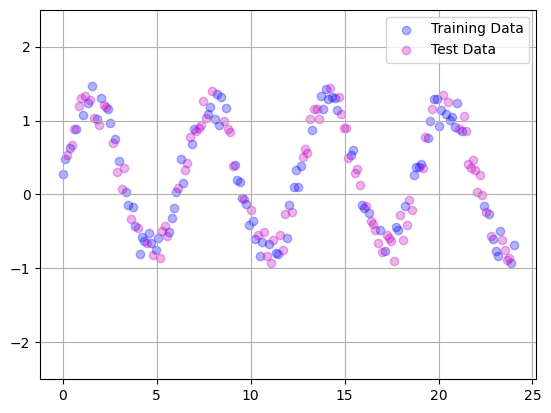

In [5]:
y_train, y_test = np.ravel(y_train), np.ravel(y_test)

def plotData(X_train,X_test,y_train,y_test):
    plt.scatter(X_train,y_train,color='b',alpha=0.3,label='Training Data')
    plt.scatter(X_test,y_test,color='m',alpha=0.3,label='Test Data')
    plt.ylim([-2.5, 2.5])
    plt.grid()
    
plotData(X_train, X_test, y_train, y_test)
plt.legend()
plt.show()

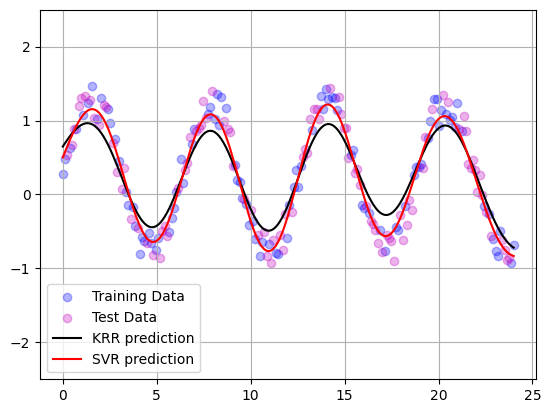

KRR, R^2 on Training Data: 0.86725
KRR, R^2 on Test Data: 0.85191
SVR, R^2 on Training Data: 0.95738
SVR, R^2 on Test Data: 0.94552


In [6]:
krr = make_pipeline(StandardScaler(),
                    KernelRidge(kernel='rbf',gamma=5)).fit(X_train,y_train)
svr = make_pipeline(StandardScaler(),
                    SVR(kernel='rbf',gamma=5)).fit(X_train,y_train)
y_krr = krr.predict(x)
y_svr = svr.predict(x)
plotData(X_train, X_test, y_train, y_test)
plt.plot(x,y_krr,color='k',label='KRR prediction')
plt.plot(x,y_svr,color='r',label='SVR prediction')
plt.legend()
plt.show()
print('KRR, R^2 on Training Data: %.5f' % krr.score(X_train,y_train))
print('KRR, R^2 on Test Data: %.5f' % krr.score(X_test,y_test))
print('SVR, R^2 on Training Data: %.5f' % svr.score(X_train,y_train))
print('SVR, R^2 on Test Data: %.5f' % svr.score(X_test,y_test))